<a href="https://colab.research.google.com/github/sauravakolia/Emotion-Detection-Of-Cartoons/blob/master/TomAndJeery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 49.0MB/s 


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!git clone https://github.com/sauravakolia/Emotion-Detection-Of-Cartoons.git

Cloning into 'Emotion-Detection-Of-Cartoons'...
remote: Enumerating objects: 791, done.
remote: Counting objects: 100% (791/791), done.
remote: Compressing objects: 100% (791/791), done.
remote: Total 7265 (delta 0), reused 788 (delta 0), pack-reused 6474
Receiving objects: 100% (7265/7265), 323.58 MiB | 43.33 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Checking out files: 100% (6808/6808), done.


In [0]:
path=Path('/content/Emotion-Detection-Of-Cartoons/Data')
path

PosixPath('/content/Emotion-Detection-Of-Cartoons/Data')

**VGG_19**

In [0]:
np.random.seed(42)
src = (ImageList.from_folder(path)
       .split_by_folder(train='Train', valid='Valid')
       .label_from_folder()
      )

In [0]:
 tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [0]:
data = (src.transform( size=224)
        .databunch().normalize(imagenet_stats))

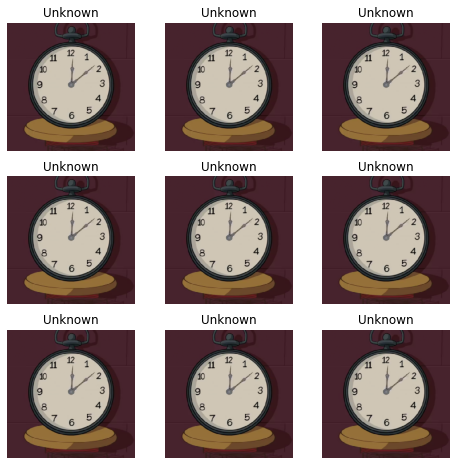

In [0]:
def _plot(i,j,ax):
    x,y = data.train_ds[541]
    x.show(ax, y=y)

    
plot_multi(_plot, 3, 3, figsize=(8,8))

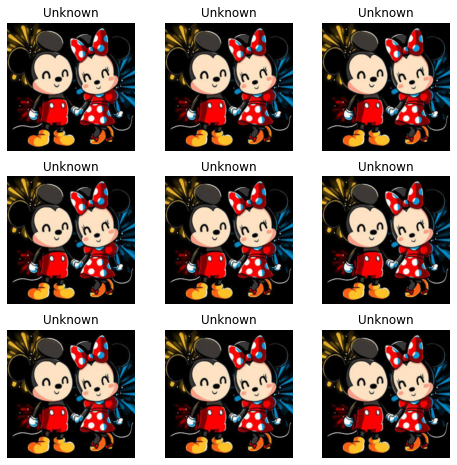

In [0]:
def _plot(i,j,ax):
    x,y = data.train_ds[5]
    x.show(ax, y=y)

    
plot_multi(_plot, 3, 3, figsize=(8,8))

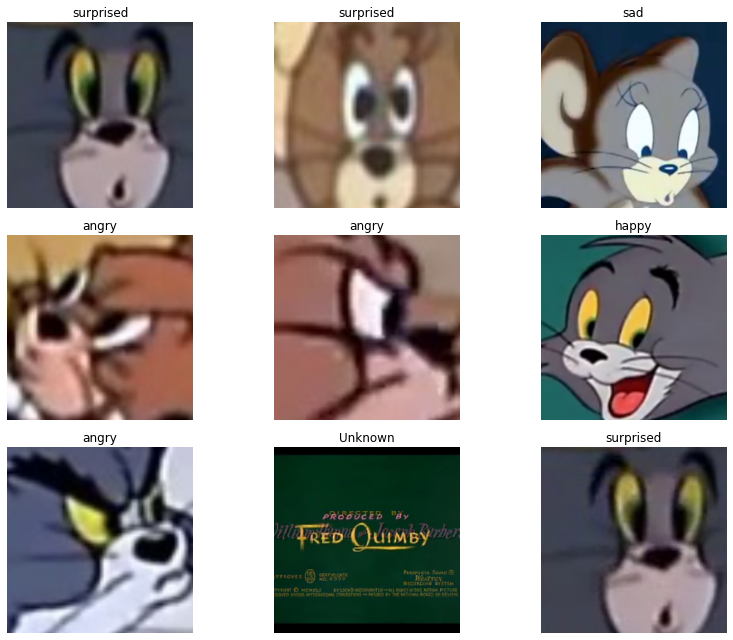

In [0]:

data.show_batch(rows=3, figsize=(12,9))

In [0]:
data.classes

['Unknown', 'angry', 'happy', 'sad', 'surprised']

In [0]:
# def vgg16_keras(pre):
#   model=vgg16(pre)
#   model=nn.Sequential(*list(children(model)), Flatten())
#   return model 
     
 
# head = nn.Sequential(
#         #  nn.AdaptiveAvgPool2d(output_size=1),
#          nn.Flatten(),
#          nn.BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
#          nn.Dropout(),
#          nn.Linear(in_features=1024, out_features=512, bias=True),
#          nn.ReLU(inplace=True),
#          nn.BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
#          nn.Dropout(p=0.5, inplace=False),
#          nn.Linear(in_features=512, out_features=4, bias=True)
         
#      )
 
# arch = models.vgg16_bn
# learn = cnn_learner(data,arch, custom_head=head)
# # learn.models.nf = 14336
# # learn.set_data(data,True)

In [0]:
# Sequential(
#   (0): AdaptiveAvgPool2d(output_size=1)
#   (1): AdaptiveMaxPool2d(output_size=1)
#   (2): Flatten()
#   (3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
#   (4): Dropout(p=0.25, inplace=False)
#   (5): Linear(in_features=1024, out_features=512, bias=True)
#   (6): ReLU(inplace=True)
#   (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
#   (8): Dropout(p=0.5, inplace=False)
#   (9): Linear(in_features=512, out_features=4, bias=True)
# )]

In [0]:
arch=models.vgg19_bn

In [0]:
learn = cnn_learner(data, arch, metrics=[accuracy]).mixup()

In [0]:
# learn.summary

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.51E-03
Min loss divided by 10: 6.92E-03


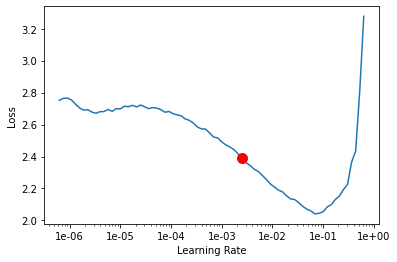

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
lr=1e-02

In [0]:
learn.fit_one_cycle(10,slice(lr))

In [0]:
learn.save('stage-1-vgg-19')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-06
Min loss divided by 10: 6.31E-08


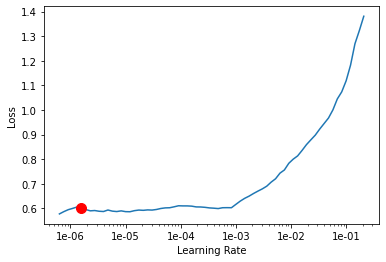

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
lr=1e-04

In [0]:
learn.fit_one_cycle(7,slice(lr))

In [0]:
learn.save('stage-2-vgg-19')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)


losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

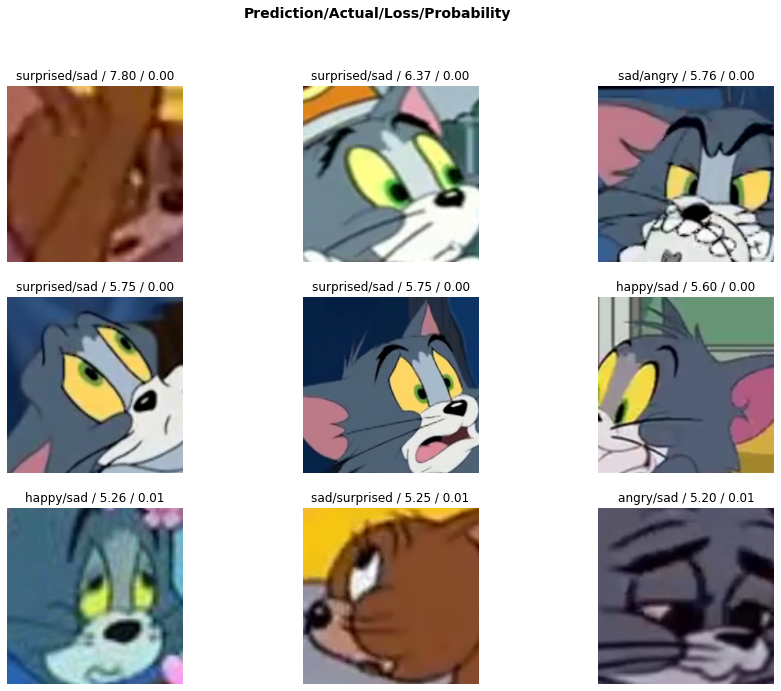

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused()

[('happy', 'surprised', 130),
 ('surprised', 'happy', 95),
 ('angry', 'surprised', 50),
 ('angry', 'happy', 34),
 ('sad', 'surprised', 34),
 ('surprised', 'angry', 23),
 ('happy', 'angry', 17),
 ('sad', 'angry', 10),
 ('happy', 'sad', 9),
 ('surprised', 'sad', 8),
 ('angry', 'sad', 7),
 ('sad', 'happy', 5),
 ('Unknown', 'happy', 2),
 ('Unknown', 'surprised', 2),
 ('angry', 'Unknown', 2),
 ('Unknown', 'angry', 1),
 ('happy', 'Unknown', 1)]

VGG_16

In [0]:
data = (src.transform(tfms=tfms,size=224)
        .databunch().normalize(imagenet_stats))

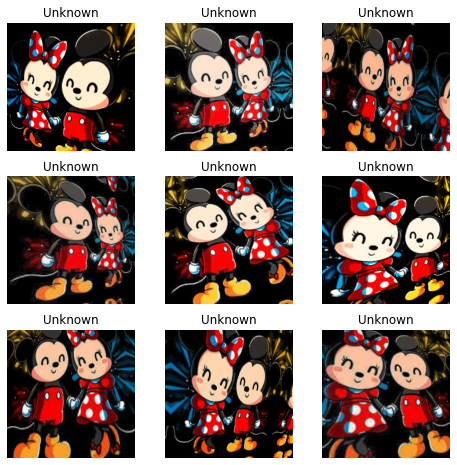

In [0]:
def _plot(i,j,ax):
    x,y = data.train_ds[5]
    x.show(ax, y=y)

    
plot_multi(_plot, 3, 3, figsize=(8,8))

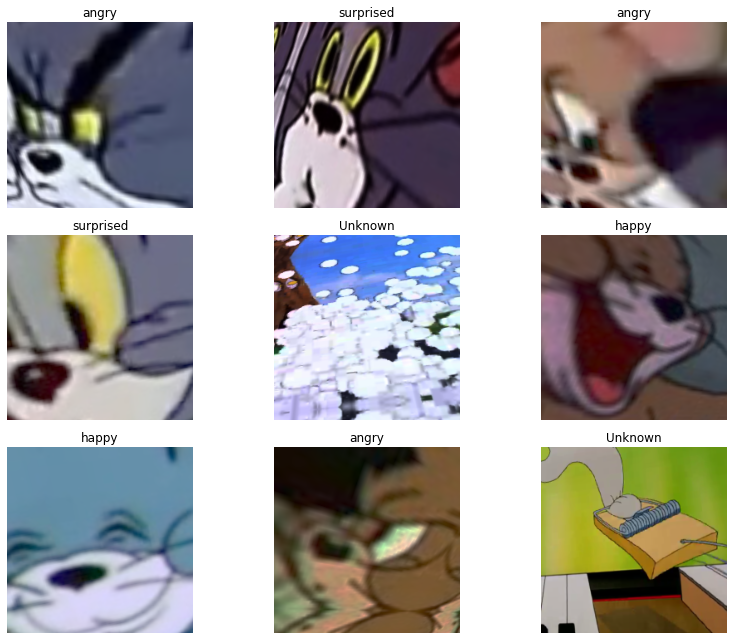

In [0]:
data.show_batch(rows=3, figsize=(12,9))

In [0]:
arch=models.vgg16_bn

In [0]:
learn=cnn_learner(data,arch,metrics=[accuracy]).mixup()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.45E-03
Min loss divided by 10: 6.92E-03


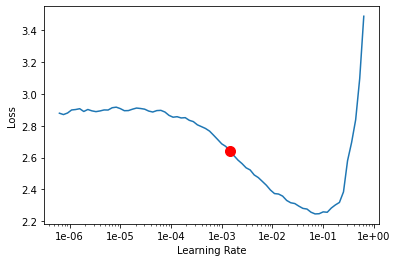

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
lr=1e-02

In [0]:
learn.fit_one_cycle(9,slice(lr))

In [0]:
learn.save('stage-1-vgg_16')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-06
Min loss divided by 10: 2.75E-05


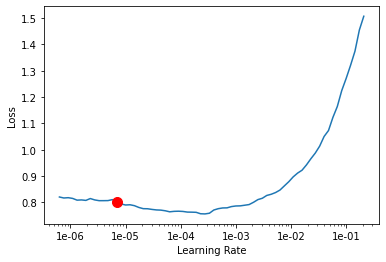

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
lr=1e-04

In [0]:
learn.fit_one_cycle(6,slice(lr,lr/2))

In [0]:
learn.save('stage-2-vgg-16')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)


losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

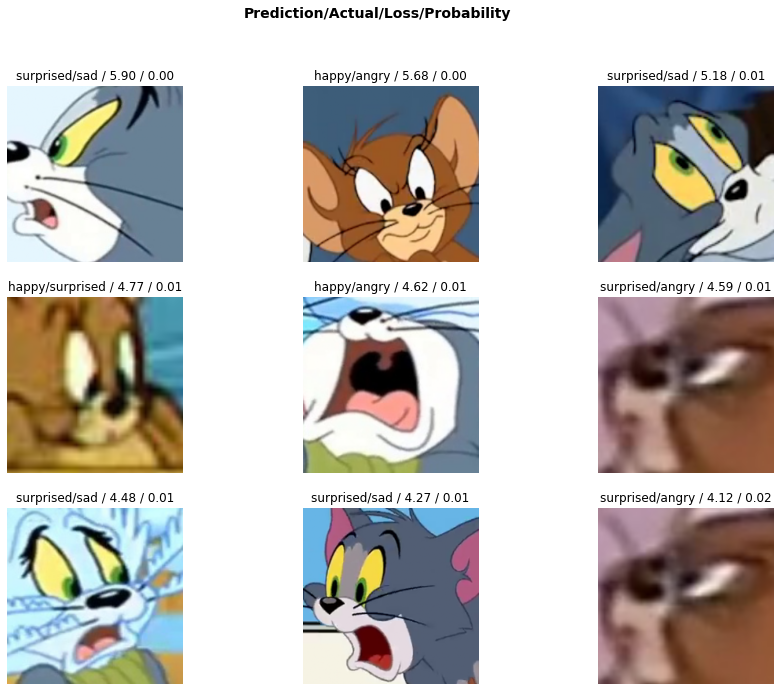

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused()

[('surprised', 'happy', 112),
 ('happy', 'surprised', 43),
 ('angry', 'happy', 32),
 ('sad', 'surprised', 23),
 ('sad', 'happy', 17),
 ('surprised', 'sad', 16),
 ('surprised', 'angry', 15),
 ('angry', 'surprised', 14),
 ('happy', 'angry', 8),
 ('happy', 'sad', 4),
 ('angry', 'sad', 3),
 ('Unknown', 'happy', 2),
 ('Unknown', 'surprised', 2),
 ('sad', 'angry', 1)]

**RESNET-18**

In [0]:
np.random.seed(42)
src = (ImageList.from_folder(path)
       .split_by_folder(train='Train', valid='Valid')
       .label_from_folder()
      )

In [0]:
 tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [0]:
data = (src.transform(tfms=tfms,size=30)
        .databunch().normalize(imagenet_stats))

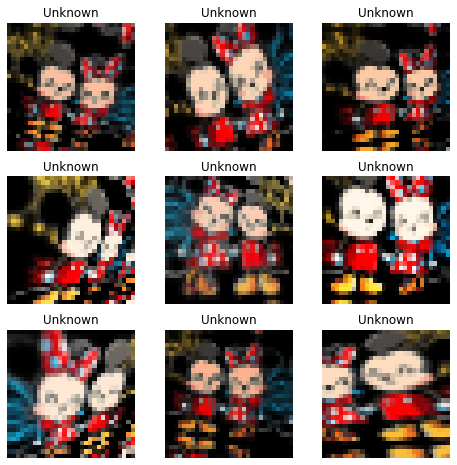

In [0]:
def _plot(i,j,ax):
    x,y = data.train_ds[5]
    x.show(ax, y=y)

    
plot_multi(_plot, 3, 3, figsize=(8,8))

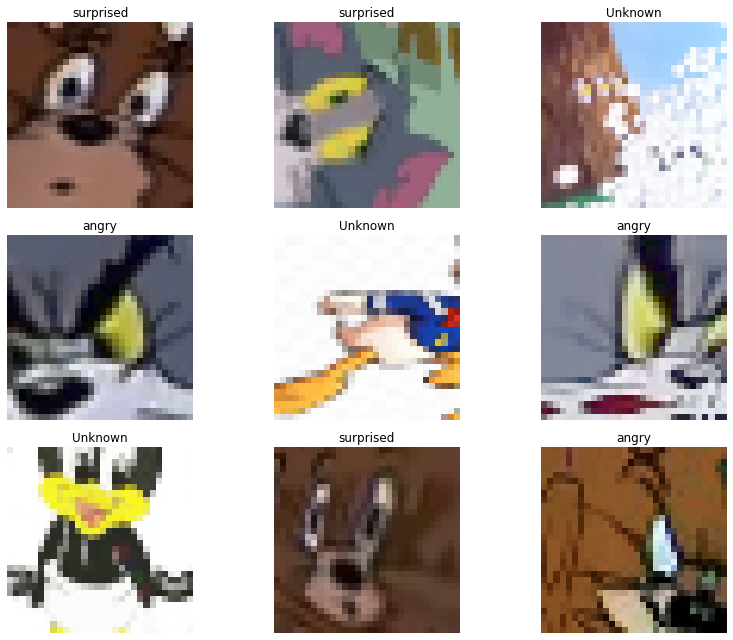

In [0]:

data.show_batch(rows=3, figsize=(12,9))

In [0]:
arch=models.resnet18
learn=cnn_learner(data,arch,metrics=[accuracy]).mixup()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 6.92E-03


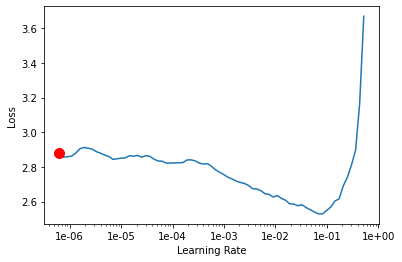

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
lr=1e-02

In [0]:
learn.fit_one_cycle(10,slice(lr))

In [0]:
learn.save('stage-1-rn-18')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.63E-04


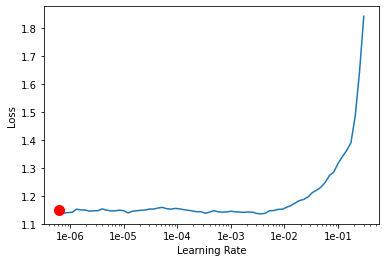

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
lr=1e-03

In [0]:
learn.fit_one_cycle(5,slice(lr,lr/2))

In [0]:
data = (src.transform(tfms=tfms,size=60)
        .databunch().normalize(imagenet_stats))

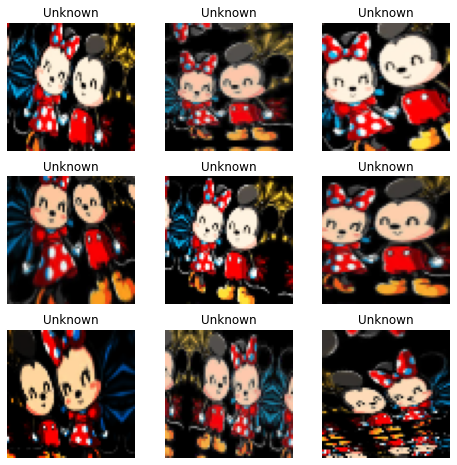

In [0]:
def _plot(i,j,ax):
    x,y = data.train_ds[5]
    x.show(ax, y=y)

    
plot_multi(_plot, 3, 3, figsize=(8,8))

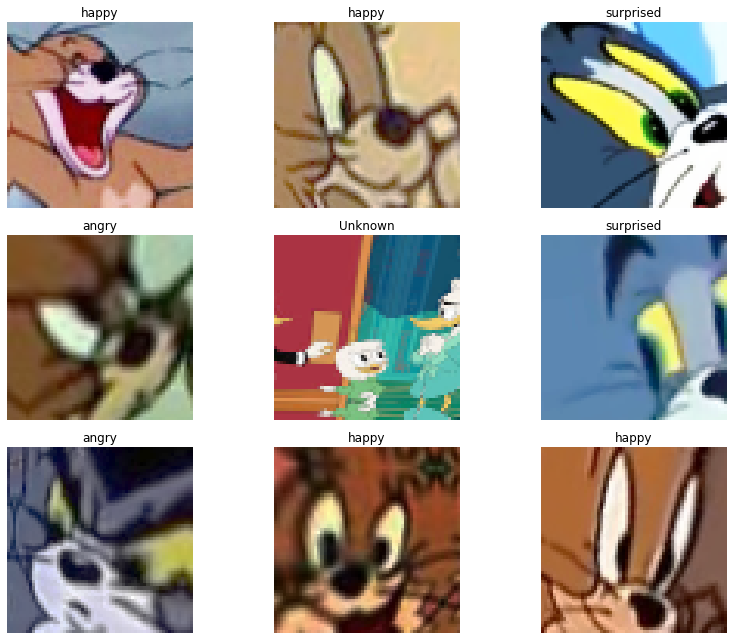

In [0]:

data.show_batch(rows=3, figsize=(12,9))

In [0]:
learn.freeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
learn.recorder.plot(suggestion=True)

Min numerical gradient: 1.10E-06
Min loss divided by 10: 6.31E-08


In [0]:
lr=3e-03

In [0]:
learn.fit_one_cycle(10,slice(lr))

In [0]:
learn.save('stage-2-rn-18')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07
Min loss divided by 10: 2.29E-05


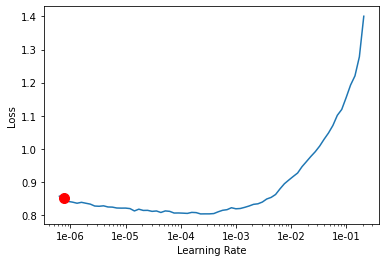

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
lr=6e-05

In [0]:
learn.fit_one_cycle(6,slice(lr))

In [0]:
learn.save('stage-3-rn-18')

In [0]:
data = (src.transform(tfms=tfms,size=128)
        .databunch().normalize(imagenet_stats))

In [0]:
def _plot(i,j,ax):
    x,y = data.train_ds[5]
    x.show(ax, y=y)

    
plot_multi(_plot, 3, 3, figsize=(8,8))

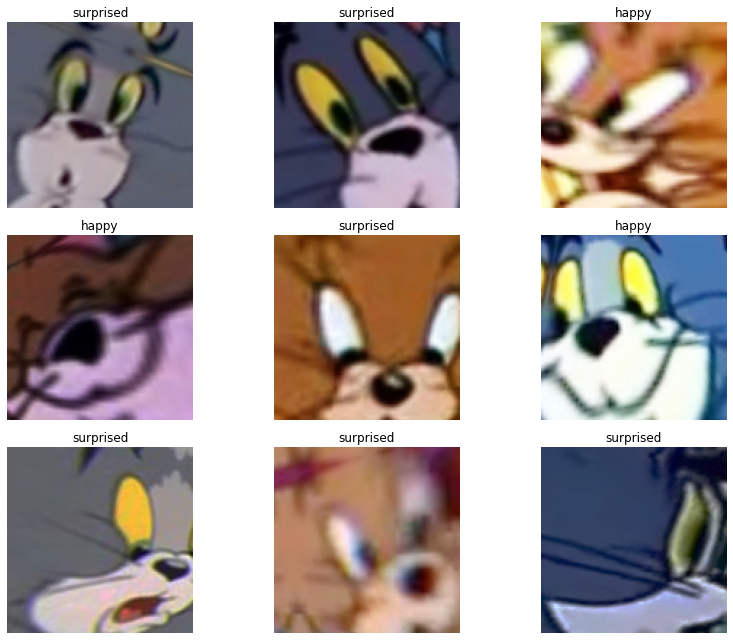

In [0]:

data.show_batch(rows=3, figsize=(12,9))

In [0]:
learn.freeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
learn.recorder.plot(suggestion=True)

Min numerical gradient: 9.12E-07
Min loss divided by 10: 4.79E-03


In [0]:
lr=3e-03

In [0]:
learn.fit_one_cycle(10,slice(lr))

In [0]:
learn.save('stage-4-rn-18')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-06
Min loss divided by 10: 8.32E-07


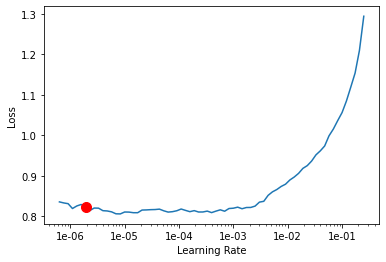

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
lr=1e-04

In [0]:
learn.fit_one_cycle(6,slice(lr))

In [0]:
learn.save('stae-4-rn-18')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)


losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused()

[('surprised', 'happy', 165),
 ('happy', 'surprised', 104),
 ('angry', 'happy', 52),
 ('happy', 'angry', 43),
 ('surprised', 'angry', 36),
 ('angry', 'surprised', 27),
 ('sad', 'surprised', 27),
 ('sad', 'happy', 21),
 ('happy', 'sad', 15),
 ('surprised', 'sad', 11),
 ('sad', 'angry', 8),
 ('Unknown', 'surprised', 6),
 ('Unknown', 'happy', 4),
 ('angry', 'sad', 4),
 ('angry', 'Unknown', 2),
 ('Unknown', 'angry', 1),
 ('happy', 'Unknown', 1)]

In [0]:
# learn.summary

In [0]:
# learn.model[-1][-1]=nn.Linear(in_features=512,out_features=5, bias=True)

In [0]:
# learn.summary

In [0]:
# learn.load('stage-6-rn101')